In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
outfile = "run41-IGH-HUMAN-shared-clones.xlsx"
ptfile = "20210621-DataSheet-RUN41-human-BCRh-UMI.csv"

## Read data

In [3]:
df_pt = pd.read_csv(ptfile, sep=",", skiprows=20)
df_pt = df_pt.rename(columns={'Sample': 'SampleInfo'})
df_pt["Sample"] = df_pt["Sample_Name"] + "_" + df_pt["Nr"]
df_pt.head()

,Sample_ID,Sample_Name,Sample_Plate,Sample_Well,I7_Index_ID,index,I5_Index_ID,index2,Run,Nr,...,Species,Chain,Patient,SampleInfo,UMI,Constant,HEK_cells,RACE,MID,Sample
0,N711_S502,BB3845-LN-B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S9,...,human,BCRh,BB3845,LN,yes,no,yes,no,NaN,BB3845-LN-B_S9
1,N712_S502,BB4554-PB-2-B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S10,...,human,BCRh,BB4554,PB,yes,no,yes,no,NaN,BB4554-PB-2-B_S10
2,N714_S502,BB3570-LN-B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S11,...,human,BCRh,BB3570,LN,yes,no,yes,no,NaN,BB3570-LN-B_S11
3,N715_S502,BB3844-LN-B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S12,...,human,BCRh,BB3844,LN,yes,no,yes,no,NaN,BB3844-LN-B_S12
4,N716_S502,BB3843-LN-B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S13,...,human,BCRh,BB3843,LN,yes,no,yes,no,NaN,BB3843-LN-B_S13


In [4]:
myfiles = [x for x in os.listdir(".") if x.startswith("cdr3-clones") and "IGH" in x]
myfiles

['cdr3-clones-Myositis-IGH_HUMAN-after-reassignment.csv',
 'cdr3-clones-Presynoviomics-IGH_HUMAN-after-reassignment.csv']

In [5]:
cols = ['Sample', 'cdr3pep', 'freq']
df = pd.read_csv(myfiles[0], sep="\t")
df = df[cols]
df.head()

,Sample,cdr3pep,freq
0,E2134-17-B4_S215,CATTFISGTTGYWGQGTLVT,7252
1,E2134-17-B4_S215,CAKREGYRQNWFAPWGQGTLVT,3161
2,E2134-17-B4_S215,CARDHTETLFYYYYMGVWGKGTTVT,919
3,E2134-17-B4_S215,CARAAAGLDYWGQGNLVT,448
4,E2134-17-B4_S215,CASDPPNSNYAFHNWGQGTLVT,383


In [6]:
for myfile in myfiles[1:]:
    df_tmp = pd.read_csv(myfile, sep="\t")
    df_tmp = df_tmp[cols]
    df = df.append(df_tmp)
df.tail()

,Sample,cdr3pep,freq
1153270,Bx1562-ST-B_S67,YAKDLNVAWDGYNYAPDYWGQGTLVT,1
1153271,Bx1562-ST-B_S67,YARDIGSSLYYWGQGTLVT,1
1153272,Bx1562-ST-B_S67,YARDWGYDSGGDAFDIWGQGTMVT,1
1153273,Bx1562-ST-B_S67,YARVFEILEDLPKYYVDYWGQGTLVT,1
1153274,Bx1562-ST-B_S67,YASPHSGRGWGQGTLVT,1


In [7]:
# Merge pt-table with clones
df = pd.merge(df, df_pt, on="Sample")
df.head()

,Sample,cdr3pep,freq,Sample_ID,Sample_Name,Sample_Plate,Sample_Well,I7_Index_ID,index,I5_Index_ID,...,Sample_Project,Species,Chain,Patient,SampleInfo,UMI,Constant,HEK_cells,RACE,MID
0,E2134-17-B4_S215,CATTFISGTTGYWGQGTLVT,7252,N710_S516,E2134-17-B4,NaN,NaN,NaN,NaN,NaN,...,Myositis,human,BCRh,MYO201,Muscle tissue,yes,no,no,no,NaN
1,E2134-17-B4_S215,CAKREGYRQNWFAPWGQGTLVT,3161,N710_S516,E2134-17-B4,NaN,NaN,NaN,NaN,NaN,...,Myositis,human,BCRh,MYO201,Muscle tissue,yes,no,no,no,NaN
2,E2134-17-B4_S215,CARDHTETLFYYYYMGVWGKGTTVT,919,N710_S516,E2134-17-B4,NaN,NaN,NaN,NaN,NaN,...,Myositis,human,BCRh,MYO201,Muscle tissue,yes,no,no,no,NaN
3,E2134-17-B4_S215,CARAAAGLDYWGQGNLVT,448,N710_S516,E2134-17-B4,NaN,NaN,NaN,NaN,NaN,...,Myositis,human,BCRh,MYO201,Muscle tissue,yes,no,no,no,NaN
4,E2134-17-B4_S215,CASDPPNSNYAFHNWGQGTLVT,383,N710_S516,E2134-17-B4,NaN,NaN,NaN,NaN,NaN,...,Myositis,human,BCRh,MYO201,Muscle tissue,yes,no,no,no,NaN


In [8]:
df = df.groupby(["Patient", "Sample", "cdr3pep"]).agg({'freq': sum})
df = df.reset_index()
df.head()

,Patient,Sample,cdr3pep,freq
0,B11BB388,B11BB388-LN-B_S82,CAAARGAEYFQHWGQGTLVT,1
1,B11BB388,B11BB388-LN-B_S82,CAAASYYYDRSGYYHVPYWGQGTLVT,1
2,B11BB388,B11BB388-LN-B_S82,CAAAYCGGDCLRHLDYWGQGALVT,1
3,B11BB388,B11BB388-LN-B_S82,CAAAYCGGDCLRHLDYWGQGTLVT,12
4,B11BB388,B11BB388-LN-B_S82,CAADPNWEGGYWGQGTLVT,1


In [9]:
df_total = df.groupby("Sample").agg({"freq": sum})
df_total = df_total.reset_index()
df_total = df_total.rename(columns={'freq': 'totalreads'})
df_total.head()

,Sample,totalreads
0,B11BB388-LN-B_S82,51228
1,B13BB1203-LN-B_S83,23531
2,B13V1-PB-B_S22,25598
3,B13V5-PB-B_S127,24916
4,B15BB931-LN-B_S84,26936


In [10]:
df = pd.merge(df, df_total, on="Sample")
df.head()

,Patient,Sample,cdr3pep,freq,totalreads
0,B11BB388,B11BB388-LN-B_S82,CAAARGAEYFQHWGQGTLVT,1,51228
1,B11BB388,B11BB388-LN-B_S82,CAAASYYYDRSGYYHVPYWGQGTLVT,1,51228
2,B11BB388,B11BB388-LN-B_S82,CAAAYCGGDCLRHLDYWGQGALVT,1,51228
3,B11BB388,B11BB388-LN-B_S82,CAAAYCGGDCLRHLDYWGQGTLVT,12,51228
4,B11BB388,B11BB388-LN-B_S82,CAADPNWEGGYWGQGTLVT,1,51228


In [11]:
df.tail()

,Patient,Sample,cdr3pep,freq,totalreads
1204317,MYO201,MYO201week52-B2_S214,YARVTLTDYYYYYGMDVWGQGTTVT,1,63162
1204318,MYO201,MYO201week52-B2_S214,YARYYDILTGYYIPALGFDYWGQGTLVT,1,63162
1204319,MYO201,MYO201week52-B2_S214,YTRHGLSLLQWYYGMDVWGQGTTVT,1,63162
1204320,MYO201,MYO201week52-B2_S214,YTRVPNVDTAMVPETYGMDVWGQGTTVT,2,63162
1204321,MYO201,MYO201week52-B2_S214,YYYYMDVWGKGTTVT,2,63162


In [12]:
df['perc'] = 100 * df['freq'] / df['totalreads']
df.head()

,Patient,Sample,cdr3pep,freq,totalreads,perc
0,B11BB388,B11BB388-LN-B_S82,CAAARGAEYFQHWGQGTLVT,1,51228,0.001952
1,B11BB388,B11BB388-LN-B_S82,CAAASYYYDRSGYYHVPYWGQGTLVT,1,51228,0.001952
2,B11BB388,B11BB388-LN-B_S82,CAAAYCGGDCLRHLDYWGQGALVT,1,51228,0.001952
3,B11BB388,B11BB388-LN-B_S82,CAAAYCGGDCLRHLDYWGQGTLVT,12,51228,0.023425
4,B11BB388,B11BB388-LN-B_S82,CAADPNWEGGYWGQGTLVT,1,51228,0.001952


## Determine overlap (shared clones) and the direction

In [13]:
ids = list(df['Sample'].unique())
ids[:10]

['B11BB388-LN-B_S82',
 'B13BB1203-LN-B_S83',
 'B13V1-PB-B_S22',
 'B13V5-PB-B_S127',
 'B15BB931-LN-B_S84',
 'B18V1-PB-B_S236',
 'B18V7-PB-B_S237',
 'B19V1-PB-B_S23',
 'B1V1-PB-B_S170',
 'B20V1-PB-B_S24']

In [14]:
def directionShared(df, idA, idB):
    df_A = df[df['Sample'] == idA]
    df_B = df[df['Sample'] == idB]
    df_pair = pd.merge(df_A, df_B, on="cdr3pep")
    sum_A = df_pair["perc_x"].sum()
    sum_B = df_pair["perc_y"].sum()
    if sum_B > sum_A:
        idA, idB = idB, idA
        sum_A, sum_B = sum_B, sum_A
    return(idA, idB, sum_A, sum_B)
directionShared(df, "DO-004V3-P5_S123", "DO-004V3-P8_S127")

('DO-004V3-P5_S123', 'DO-004V3-P8_S127', 0.0, 0.0)

In [15]:
sources = list()
targets = list()
impacts_source = list()
impacts_target = list()
for i in range(len(ids)-1):
    for j in range(i+1, len(ids)):
        idA = ids[i]
        idB = ids[j]
        (source, target, impact_source, impact_target) = directionShared(df, idA, idB)
        sources.append(source)
        targets.append(target)
        impacts_source.append(impact_source)
        impacts_target.append(impact_target)
df_shared = pd.DataFrame({'source': sources, 'target': targets, 'impact_source': impacts_source, 'impact_target': impacts_target})
df_shared.head()

,source,target,impact_source,impact_target
0,B13BB1203-LN-B_S83,B11BB388-LN-B_S82,0.004250,0.001952
1,B11BB388-LN-B_S82,B13V1-PB-B_S22,0.072226,0.003907
2,B11BB388-LN-B_S82,B13V5-PB-B_S127,0.000000,0.000000
3,B11BB388-LN-B_S82,B15BB931-LN-B_S84,0.000000,0.000000
4,B18V1-PB-B_S236,B11BB388-LN-B_S82,0.003499,0.001952


In [16]:
# Add patient columns for the source and the target
cols = ["Patient", "Sample"]
df_sample_patient = df_pt[cols]
df_shared = pd.merge(df_shared, df_sample_patient, left_on="source", right_on="Sample").rename(columns={"Patient": "patient_source", "Sample": "sample_source"})
df_shared = pd.merge(df_shared, df_sample_patient, left_on="target", right_on="Sample").rename(columns={"Patient": "patient_target", "Sample": "sample_target"})
cols = ["source", "target", "impact_source", "impact_target", "patient_source", "patient_target"]
df_shared = df_shared[cols]
df_shared.head()

,source,target,impact_source,impact_target,patient_source,patient_target
0,B13BB1203-LN-B_S83,B11BB388-LN-B_S82,0.004250,0.001952,B13BB1203,B11BB388
1,B18V1-PB-B_S236,B11BB388-LN-B_S82,0.003499,0.001952,B18V1,B11BB388
2,B18V7-PB-B_S237,B11BB388-LN-B_S82,0.051531,0.003904,B18V7,B11BB388
3,B19V1-PB-B_S23,B11BB388-LN-B_S82,0.014862,0.011712,B19V1,B11BB388
4,B24V1-PB-B_S43,B11BB388-LN-B_S82,0.018979,0.015616,B24V1,B11BB388


In [17]:
# sort on impact on the target and then on impact of the source
df_shared = df_shared.sort_values(by=["impact_target", "impact_source"], ascending=False)
df_shared = df_shared.reset_index()
df_shared.head()

,index,source,target,impact_source,impact_target,patient_source,patient_target
0,1540,BB4679-LN-B_S38,BB3208-LN-B_S37,45.668755,45.290537,BB4679,BB3208
1,3688,BB3089-LN-B_S33,BB5579-LN-B_S34,38.234792,38.192155,BB3089,BB5579
2,6294,BB4554-PB-1-B_S149,BB4554-PB-2-B_S10,24.312577,22.163855,BB4554,BB4554
3,2897,BB1307-LN-B_S14,BB5376-LN-B_S21,57.998179,18.627137,BB1307,BB5376
4,6448,B68BB6132-LN-B_S107,BB5531-LN-B_S61,55.166458,17.975634,B68BB6132,BB5531


In [18]:
same_pt = list()
for i in range(len(df_shared)):
    if df_shared['patient_source'][i] == df_shared['patient_target'][i]:
        same_pt.append("same")
    else:
        same_pt.append("different")
df_shared["Same patient"] = same_pt
df_shared.head()

,index,source,target,impact_source,impact_target,patient_source,patient_target,Same patient
0,1540,BB4679-LN-B_S38,BB3208-LN-B_S37,45.668755,45.290537,BB4679,BB3208,different
1,3688,BB3089-LN-B_S33,BB5579-LN-B_S34,38.234792,38.192155,BB3089,BB5579,different
2,6294,BB4554-PB-1-B_S149,BB4554-PB-2-B_S10,24.312577,22.163855,BB4554,BB4554,same
3,2897,BB1307-LN-B_S14,BB5376-LN-B_S21,57.998179,18.627137,BB1307,BB5376,different
4,6448,B68BB6132-LN-B_S107,BB5531-LN-B_S61,55.166458,17.975634,B68BB6132,BB5531,different


In [19]:
df_shared.to_excel(outfile)
print("Wrote", outfile, "to disk")

Wrote run41-IGH-HUMAN-shared-clones.xlsx to disk


## Visualize it

In [20]:
df_shared = df_shared[(df_shared["impact_source"] != 0) & (df_shared["impact_target"] != 0)]
df_shared = df_shared.reset_index()
df_shared.head()

,level_0,index,source,target,impact_source,impact_target,patient_source,patient_target,Same patient
0,0,1540,BB4679-LN-B_S38,BB3208-LN-B_S37,45.668755,45.290537,BB4679,BB3208,different
1,1,3688,BB3089-LN-B_S33,BB5579-LN-B_S34,38.234792,38.192155,BB3089,BB5579,different
2,2,6294,BB4554-PB-1-B_S149,BB4554-PB-2-B_S10,24.312577,22.163855,BB4554,BB4554,same
3,3,2897,BB1307-LN-B_S14,BB5376-LN-B_S21,57.998179,18.627137,BB1307,BB5376,different
4,4,6448,B68BB6132-LN-B_S107,BB5531-LN-B_S61,55.166458,17.975634,B68BB6132,BB5531,different


In [21]:
def makeScatter(x,y,txt,color,xlabel,ylabel,plotfile):
    fig, ax = plt.subplots(figsize=(15,15))
    ax.scatter(x, y, color=color)

    for i, txt in enumerate(txt):
        ax.annotate(txt, (x[i], y[i]))
        
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Add red dotted line
    ax.plot([-1, 100], [-1, 100], c='w', linestyle=":")
    
    # Save figure to file
    fig.savefig(plotfile)
    print("Wrote", plotfile, "to disk")

In [22]:
f = lambda x,y: x + "->" + y
df_shared['txt'] = [x for x in map(f, df_shared['source'], df_shared['target'])]
df_shared['color'] = "blue"
df_shared.loc[df_shared["Same patient"] == "same", 'color'] = "purple"
df_shared.head()

,level_0,index,source,target,impact_source,impact_target,patient_source,patient_target,Same patient,txt,color
0,0,1540,BB4679-LN-B_S38,BB3208-LN-B_S37,45.668755,45.290537,BB4679,BB3208,different,BB4679-LN-B_S38->BB3208-LN-B_S37,blue
1,1,3688,BB3089-LN-B_S33,BB5579-LN-B_S34,38.234792,38.192155,BB3089,BB5579,different,BB3089-LN-B_S33->BB5579-LN-B_S34,blue
2,2,6294,BB4554-PB-1-B_S149,BB4554-PB-2-B_S10,24.312577,22.163855,BB4554,BB4554,same,BB4554-PB-1-B_S149->BB4554-PB-2-B_S10,purple
3,3,2897,BB1307-LN-B_S14,BB5376-LN-B_S21,57.998179,18.627137,BB1307,BB5376,different,BB1307-LN-B_S14->BB5376-LN-B_S21,blue
4,4,6448,B68BB6132-LN-B_S107,BB5531-LN-B_S61,55.166458,17.975634,B68BB6132,BB5531,different,B68BB6132-LN-B_S107->BB5531-LN-B_S61,blue


Wrote run41-IGH-HUMAN-shared-clones-all.pdf to disk


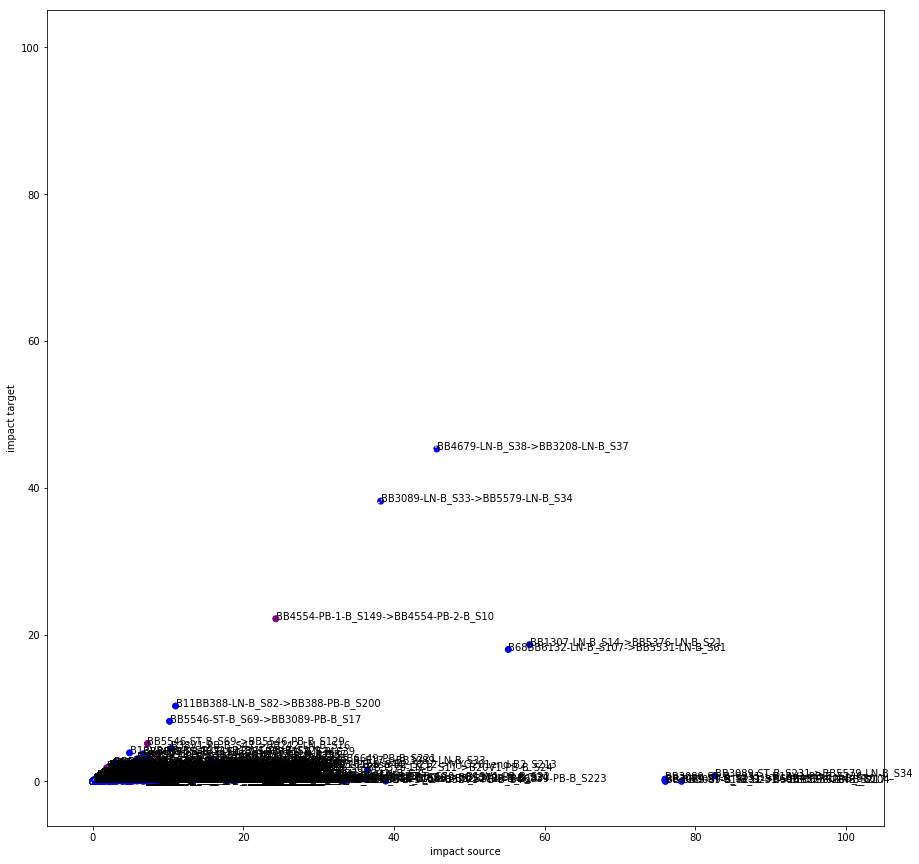

In [23]:
plotfile = outfile.replace(".xlsx", "-all.pdf")
makeScatter(df_shared["impact_source"], df_shared["impact_target"], df_shared['txt'], df_shared['color'], "impact source", "impact target", plotfile)

In [24]:
# Only show things that are different
df_shared_filter = df_shared.copy()
df_shared_filter = df_shared_filter[df_shared_filter["Same patient"] == "different"]
cols = ["source", "target", "impact_source", "impact_target", "Same patient", "txt", "color"]
df_shared_filter = df_shared_filter[cols]
df_shared_filter = df_shared_filter.reset_index()
df_shared_filter.head()

,index,source,target,impact_source,impact_target,Same patient,txt,color
0,0,BB4679-LN-B_S38,BB3208-LN-B_S37,45.668755,45.290537,different,BB4679-LN-B_S38->BB3208-LN-B_S37,blue
1,1,BB3089-LN-B_S33,BB5579-LN-B_S34,38.234792,38.192155,different,BB3089-LN-B_S33->BB5579-LN-B_S34,blue
2,3,BB1307-LN-B_S14,BB5376-LN-B_S21,57.998179,18.627137,different,BB1307-LN-B_S14->BB5376-LN-B_S21,blue
3,4,B68BB6132-LN-B_S107,BB5531-LN-B_S61,55.166458,17.975634,different,B68BB6132-LN-B_S107->BB5531-LN-B_S61,blue
4,5,B11BB388-LN-B_S82,BB388-PB-B_S200,11.001796,10.279210,different,B11BB388-LN-B_S82->BB388-PB-B_S200,blue


Wrote run41-IGH-HUMAN-shared-clones-different-ids.pdf to disk


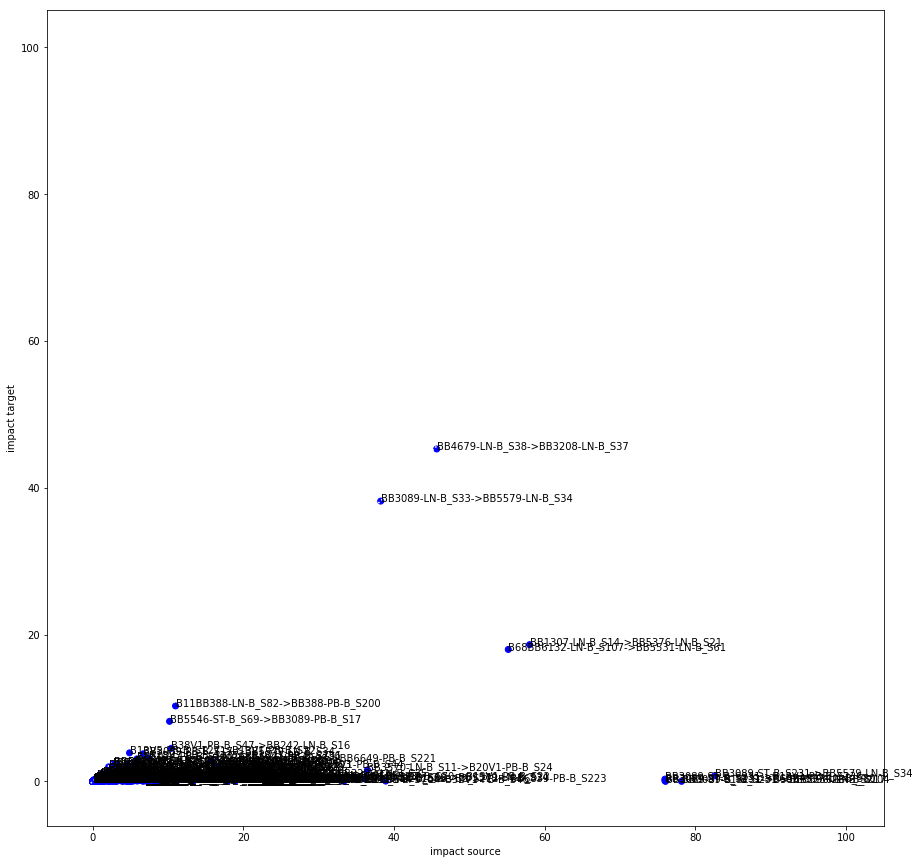

In [25]:
plotfile = outfile.replace(".xlsx", "-different-ids.pdf")
makeScatter(df_shared_filter["impact_source"], df_shared_filter["impact_target"], df_shared_filter['txt'], df_shared_filter['color'], "impact source", "impact target", plotfile)

## Calculate common/public clones

In [26]:
df.head()

,Patient,Sample,cdr3pep,freq,totalreads,perc
0,B11BB388,B11BB388-LN-B_S82,CAAARGAEYFQHWGQGTLVT,1,51228,0.001952
1,B11BB388,B11BB388-LN-B_S82,CAAASYYYDRSGYYHVPYWGQGTLVT,1,51228,0.001952
2,B11BB388,B11BB388-LN-B_S82,CAAAYCGGDCLRHLDYWGQGALVT,1,51228,0.001952
3,B11BB388,B11BB388-LN-B_S82,CAAAYCGGDCLRHLDYWGQGTLVT,12,51228,0.023425
4,B11BB388,B11BB388-LN-B_S82,CAADPNWEGGYWGQGTLVT,1,51228,0.001952


In [27]:
concat = lambda x: ", ".join(list(set(x)))
df_clone_occurrence = df.groupby('cdr3pep').agg({'Patient': [pd.Series.nunique, concat], 'Sample': [pd.Series.nunique, concat]})

In [28]:
df_clone_occurrence = df_clone_occurrence.rename(columns={'<lambda>': 'names'})
df_clone_occurrence.head()

Patient          Sample                  
                           nunique   names nunique             names
cdr3pep                                                             
AAAGNYYYYYGMDVWGQGTTVT           1  BB5419       1  BB5419-PB-B_S207
AAAGTGFDPWGQGTLVT                1   B21V2       1    B21V2-PB-B_S41
AARDYYDTSGYSRFDPWGQGTLVT         1   BB508       1   BB508-PB-B_S188
AARQRRHLESGEVFWFDPWGQGTLVT       1  BB4554       1   BB4554-LN-B_S58
AASAPEAGTLYYYGMDVWGQGTTVT        1  BB5492       1  BB5492-PB-B_S150

In [29]:
# Get percentage columns for each sample
df_pivot = df.pivot_table(index='cdr3pep', columns=['Patient','Sample'], values='perc', aggfunc='sum')
df_pivot = df_pivot.reset_index()
df_pivot.head()

Patient                     cdr3pep          B11BB388          B13BB1203  \
Sample                              B11BB388-LN-B_S82 B13BB1203-LN-B_S83   
0            AAAGNYYYYYGMDVWGQGTTVT               NaN                NaN   
1                 AAAGTGFDPWGQGTLVT               NaN                NaN   
2          AARDYYDTSGYSRFDPWGQGTLVT               NaN                NaN   
3        AARQRRHLESGEVFWFDPWGQGTLVT               NaN                NaN   
4         AASAPEAGTLYYYGMDVWGQGTTVT               NaN                NaN   

Patient          B13V1           B13V5          B15BB931           B18V1  \
Sample  B13V1-PB-B_S22 B13V5-PB-B_S127 B15BB931-LN-B_S84 B18V1-PB-B_S236   
0                  NaN             NaN               NaN             NaN   
1                  NaN             NaN               NaN             NaN   
2                  NaN             NaN               NaN             NaN   
3                  NaN             NaN               NaN             NaN   
4                  NaN             NaN               NaN             NaN   

Patient           B18V7          B19V1           B1V1         ...           \
Sample  B18V7-PB-B_S237 B19V1-PB-B_S23 B1V1-PB-B_S170         ...            
0                   NaN            NaN            NaN         ...            
1                   NaN            NaN            NaN         ...            
2                   NaN            NaN            NaN         ...            
3                   NaN            NaN            NaN         ...            
4                   NaN            NaN            NaN         ...            

Patient           BB6839           BB701           BB709           Bx1338  \
Sample  BB6839-PB-B_S223 BB701-PB-B_S171 BB709-PB-B_S184 Bx1338-ST-B_S233   
0                    NaN             NaN             NaN              NaN   
1                    NaN             NaN             NaN              NaN   
2                    NaN             NaN             NaN              NaN   
3                    NaN             NaN             NaN              NaN   
4                    NaN             NaN             NaN              NaN   

Patient           Bx1481          Bx1562           MYO201                     \
Sample  Bx1481-ST-B_S230 Bx1562-ST-B_S67 E2134-17-B4_S215 MYO201base-B2_S212   
0                    NaN             NaN              NaN                NaN   
1                    NaN             NaN              NaN                NaN   
2                    NaN             NaN              NaN                NaN   
3                    NaN             NaN              NaN                NaN   
4                    NaN             NaN              NaN                NaN   

Patient                                         
Sample  MYO201end-B2_S213 MYO201week52-B2_S214  
0                     NaN                  NaN  
1                     NaN                  NaN  
2                     NaN                  NaN  
3                     NaN                  NaN  
4                     NaN                  NaN  

[5 rows x 123 columns]

In [30]:
df_clone_occurrence = pd.merge(df_clone_occurrence, df_pivot, on='cdr3pep')
df_clone_occurrence = df_clone_occurrence.sort_values(by=[('Patient','nunique'), ('Sample','nunique')], ascending=False)
df_clone_occurrence = df_clone_occurrence.reset_index()
df_clone_occurrence.head()

/data/home/bioinfo/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3108: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


index             cdr3pep Patient  \
                               nunique   
0  1180793           CWGQGTLVT      29   
1   408742     CARDLDYWGQGTLVT      26   
2   658333  CARGHYGMDVWGQGTTVT      25   
3   676065   CARGNWFDPWGQGTLVT      20   
4   365544     CARDFDYWGQGTLVT      19   

                                                      Sample  \
                                               names nunique   
0  B86BB6839, BB3845, Bx1562, BB3855, BB3089, MYO...      34   
1  B23V1, BB5419, BB3844, BB4382, BB3089, BB111, ...      28   
2  B86BB6839, BB3855, BB4382, B59BB5556, BB111, B...      29   
3  BB1340, BB6282, BB265, BB1180, BB4727, BB3709,...      22   
4  B9BB1340, B23V1, BB4395, BB4726, BB5492, BB523...      20   

                                                              B11BB388  \
                                               names B11BB388-LN-B_S82   
0  BB3089-ST-B_S231, B86BB6839-LN-B_S110, BB1339-...               NaN   
1  B23V1-PB-B_S42, BB4345-PB-B_S205, BB4679-PB-B_...               NaN   
2  B83BB6674-LN-B_S109, BB6282-LN-B_S63, BB6649-P...          0.001952   
3  B21V2-PB-B_S41, BB4345-PB-B_S205, BB4679-PB-B_...          0.011712   
4  B23V1-PB-B_S42, BB4685-PB-B_S19, BB5238-PB-B_S...               NaN   

           B13BB1203          B13V1           B13V5         ...           \
  B13BB1203-LN-B_S83 B13V1-PB-B_S22 B13V5-PB-B_S127         ...            
0           0.012749            NaN             NaN         ...            
1                NaN        0.01172             NaN         ...            
2           0.004250            NaN             NaN         ...            
3                NaN            NaN             NaN         ...            
4                NaN            NaN             NaN         ...            

            BB6839           BB701           BB709           Bx1338  \
  BB6839-PB-B_S223 BB701-PB-B_S171 BB709-PB-B_S184 Bx1338-ST-B_S233   
0         0.002531             NaN             NaN              NaN   
1              NaN        0.017636             NaN              NaN   
2         0.017718             NaN             NaN              NaN   
3              NaN        0.017636             NaN              NaN   
4              NaN             NaN             NaN              NaN   

            Bx1481          Bx1562           MYO201                     \
  Bx1481-ST-B_S230 Bx1562-ST-B_S67 E2134-17-B4_S215 MYO201base-B2_S212   
0              NaN        0.007569              NaN           0.001793   
1              NaN             NaN              NaN                NaN   
2              NaN             NaN              NaN                NaN   
3              NaN             NaN              NaN                NaN   
4              NaN             NaN              NaN           0.005379   

                                          
  MYO201end-B2_S213 MYO201week52-B2_S214  
0          0.002156             0.001583  
1          0.010782                  NaN  
2               NaN                  NaN  
3               NaN             0.003166  
4               NaN             0.006333  

[5 rows x 128 columns]

In [31]:
# Only keep entries that are in 2 or more Samples
print("All cdr3's:", len(df_clone_occurrence))
df_clone_occurrence = df_clone_occurrence[df_clone_occurrence[('Sample','nunique')] > 1]
print("cdr3's in > 1 sample:", len(df_clone_occurrence))

All cdr3's: 1187205
cdr3's in > 1 sample: 14411


In [32]:
occurrence_file = outfile.replace(".xlsx", "-occurrence.xlsx")
df_clone_occurrence.to_excel(occurrence_file)
print("Wrote", occurrence_file, "to disk")

Wrote run41-IGH-HUMAN-shared-clones-occurrence.xlsx to disk
